In [2]:
import pandas as pd
import numpy as np 
import joblib
import shap
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from xgboost import XGBClassifier

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
address = "C:/Users/hp/Desktop/Kifya/Week_5/credit-risk-model/data/"
df1 = pd.read_csv(address + "Processed/Processed_task-4.csv")
df = pd.read_csv(address + "Processed/processed_data_feature_eng.csv")

In [4]:
df1['is_high_risk'] = df1['is_high_risk'].fillna(df1['FraudResult'])
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,Amount,...,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,0.0,ProviderId_6,ProductId_10,-0.046371,...,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.075205,-0.796656,0.824740,-0.105245
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,0.0,ProviderId_4,ProductId_6,-0.054643,...,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.075205,1.255247,-1.212503,-0.105245
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,0.0,ProviderId_6,ProductId_1,-0.050426,...,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.075205,-0.796656,0.824740,-0.105245
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,0.0,ProviderId_1,ProductId_21,0.107717,...,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,6.987414,-0.075205,-0.796656,0.824740,-0.105245
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,0.0,ProviderId_4,ProductId_6,-0.059704,...,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.075205,1.255247,-1.212503,-0.105245


## Model Selection and Training

## devided the dataset into target variabe and predictors

In [5]:
# a target variable for traing the model
y=df1["is_high_risk"]
# a preictor variables except target varable
x=df.drop(columns=['TransactionId', 'BatchId', 'AccountId',	'SubscriptionId',	'CustomerId',	'CurrencyCode',	'CountryCode', 'ProviderId', 'ProductId', 'TransactionStartTime', 'transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year'], inplace=False)
x = x.apply(pd.to_numeric, errors='coerce')

## split the dataset to traning and testing dataset to train the ML model

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## choose models 

In [17]:
with mlflow.start_run(run_name="logistic-regression-woe"):
    lr_model=LogisticRegression()
    lr_model.fit(x_train,y_train)

    y_pred = lr_model.predict(x_test)

    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("f1", f1_score(y_test, y_pred))

    print("Logistic Regression Results:")
    print(classification_report(y_test, y_pred))
    
    mlflow.sklearn.log_model(lr_model, "model", registered_model_name="credit-risk-logreg")



2025/07/04 12:24:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18825
         1.0       0.99      0.98      0.99       308

    accuracy                           1.00     19133
   macro avg       0.99      0.99      0.99     19133
weighted avg       1.00      1.00      1.00     19133



2025/07/04 12:24:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'credit-risk-logreg' already exists. Creating a new version of this model...
Created version '2' of model 'credit-risk-logreg'.


## train the models

In [18]:
with mlflow.start_run(run_name="random-forest-classifier"):
    rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(x_train,y_train)

    y_pred = rf_model.predict(x_test)
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("f1", f1_score(y_test, y_pred))
    print("Logistic Regression Results:")
    print(classification_report(y_test, y_pred))

    mlflow.sklearn.log_model(rf_model, "model", registered_model_name="credit-risk-rf_model")

2025/07/04 12:25:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18825
         1.0       0.99      1.00      1.00       308

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



2025/07/04 12:25:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'credit-risk-rf_model' already exists. Creating a new version of this model...
Created version '2' of model 'credit-risk-rf_model'.


In [7]:
with mlflow.start_run(run_name="XGB-classifier"):
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb.fit(x_train, y_train)

    y_pred = xgb.predict(x_test)
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("f1", f1_score(y_test, y_pred))
    print("XGBoost Results:")
    print(classification_report(y_test, y_pred))

    mlflow.sklearn.log_model(xgb, "model", registered_model_name="credit-risk-XGB")

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:31:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/07/04 12:31:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


XGBoost Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18825
         1.0       0.99      1.00      1.00       308

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



2025/07/04 12:31:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'credit-risk-XGB' already exists. Creating a new version of this model...
Created version '2' of model 'credit-risk-XGB'.


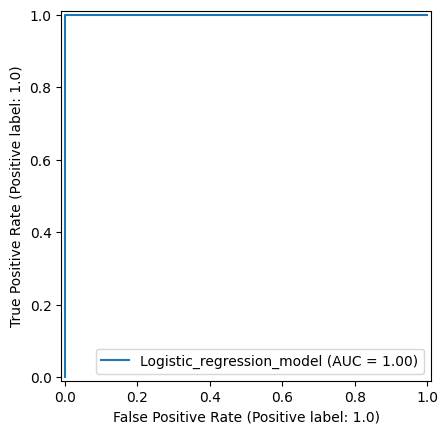

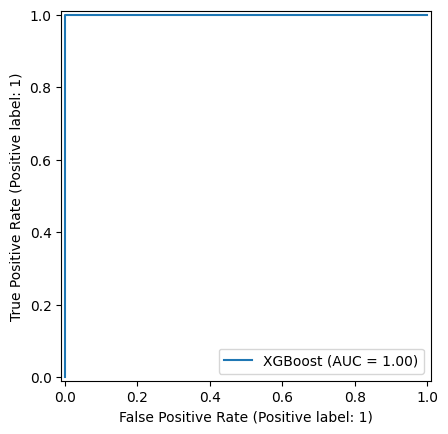

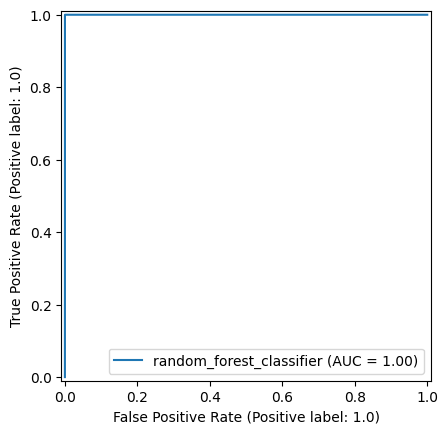

In [40]:
RocCurveDisplay.from_estimator(lr_model, x_test, y_test, name="Logistic_regression_model")
RocCurveDisplay.from_estimator(xgb, x_test, y_test, name="XGBoost")
RocCurveDisplay.from_estimator(rf_model, x_test, y_test, name="random_forest_classifier")

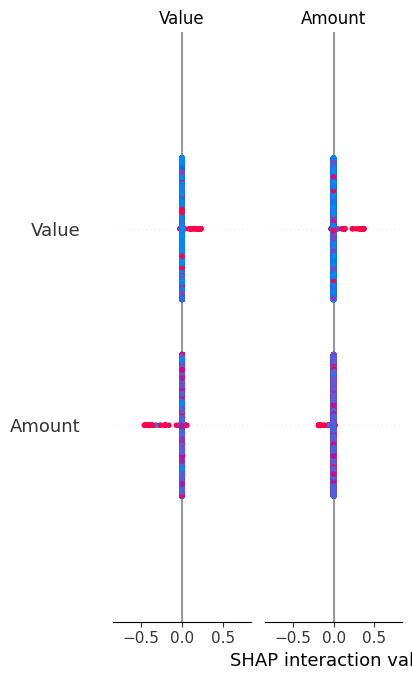

In [34]:
explainer = shap.Explainer(rf_model)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test)

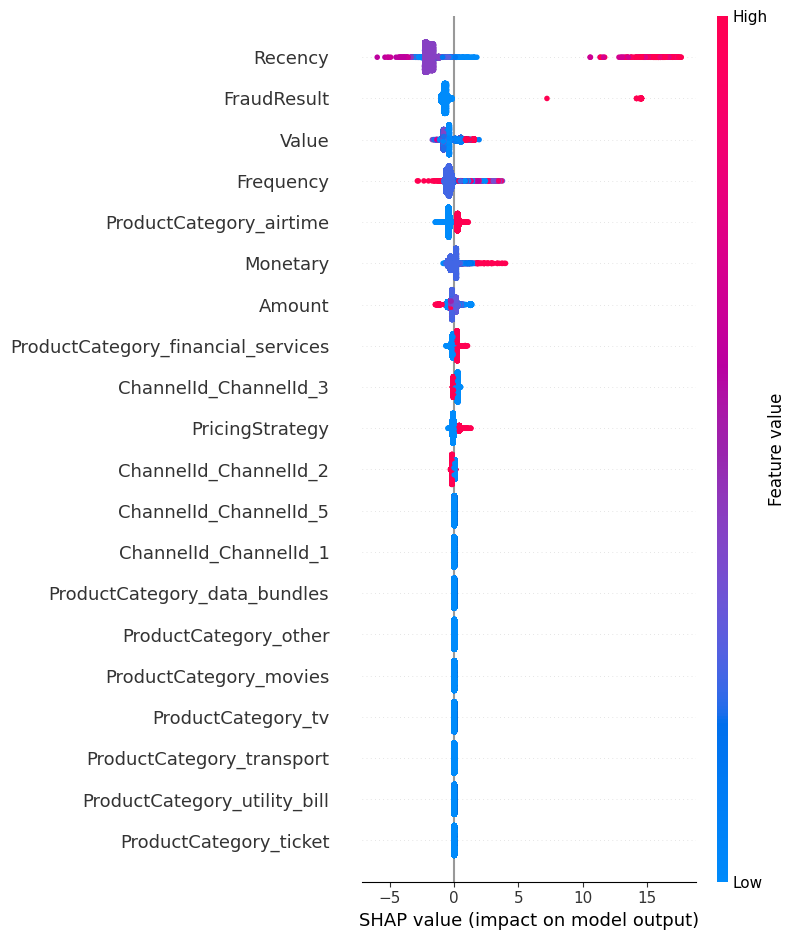

In [35]:
explainer = shap.Explainer(xgb)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test)

In [36]:
joblib.dump(lr_model, "C:/Users/hp/Desktop/Kifya/Week_5/credit-risk-model/model/logistic_model.pkl")
joblib.dump(xgb, "C:/Users/hp/Desktop/Kifya/Week_5/credit-risk-model/model/xgb_model.pkl")
joblib.dump(rf_model, "C:/Users/hp/Desktop/Kifya/Week_5/credit-risk-model/model/rf_model.pkl")

['C:/Users/hp/Desktop/Kifya/Week_5/credit-risk-model/model/rf_model.pkl']